In [ ]:
## Hard to implement. Doubtful if it works

## Identify Market Trend by looking back X bars ?
## Market is Consolidated when avg price remains constant
## Market moves in waves forming resistance and support

## IF YOU WANT MACHINE LEARNING . WHERE WILL YOU GET THE DATA FROM ?

## SEARCH ONLINE FOR TREND INDICATORS.

## Can use indicator to know if there is a market rally
## Program should accept command in runtime to change or fix the market_state if the user wants at any point of time
## TODO : Make this process automated

## Use EMA(X) to find market trend
## Smooth the curve find the wave. Keep uptil secondary extremas . If maxima and minima both stay almost the same then set market_state = consolidating
## If curve forms lower maxima and lower minima set market_state = down_discovery
## If curve forms higher minima and higher maxima set market state = up_discovery
## If curve forms almost same minima and higher maxima set market_state = mixed_up
## If curve forms almost same maxima and lower minima set market_state = mixed_down
## TODO : Make it probabilistic if possible.


##  Target Today
##  Simple Macd Algorithm
##  Create function for backtesting  


## Reinforcement learning 
## with one of the following model
## Genetic Algorithm / Neural Net / SVM or some other network suitable for high entropy data.
## output from the model should be binary {0,1} i.e Accept the proposal or reject it
## A timestep consists of a signal from one of the well known indicators {MACD, RSI, Bolinger Bands, Crosses a predifined level?}
## Feature vector has following format  =  [ Last 20 avg candles | EMA14 | EMA26 | SMA50 | RSI | ADI | BolingerBand Low | BolingerBand High | Fibonacci retracement levels | Onehot Trigger Type ] 
## Once a trade is locked by accepting signal from S. We wait for S to give opposite signal to exit the position. 
## Model is rewarded by profit/loss number of points on trade completetion
## Challenge : Batch Normalization ?  Will it work ?
## Challenge : Overfitting(Major issue in stock predictions)

## Hope is that model learns when to follow which indicator. for eg: When market has been trending then following MACD may be a good idea.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/personal_projects/ta-lib

/content/drive/My Drive/personal_projects/ta-lib


In [ ]:
%cd ta-lib

[Errno 2] No such file or directory: 'ta-lib'
/content/drive/My Drive/personal_projects/ta-lib


In [ ]:
%ls -l

total 2374
-rw------- 1 root root 261255 Sep 15  2007 aclocal.m4
-rw------- 1 root root    213 Sep 15  2007 autogen.sh
drwx------ 2 root root   4096 Sep 15  2007 autom4te.cache/
-rw------- 1 root root    965 Sep 15  2007 CHANGELOG.TXT
-rw------- 1 root root  44208 Nov  8  2006 config.guess
-rw------- 1 root root  50501 Jul 22 18:22 config.log
-rw------- 1 root root  33999 Jul 22 18:22 config.status
-rw------- 1 root root  32560 Nov  8  2006 config.sub
-rw------- 1 root root 716193 Sep 15  2007 configure
-rw------- 1 root root   1539 Sep 15  2007 configure.in
-rw------- 1 root root  17574 Sep 15  2007 depcomp
-rw------- 1 root root   3938 Sep 15  2007 HISTORY.TXT
drwx------ 2 root root   4096 Sep 15  2007 include/
-rw------- 1 root root  13184 Sep 15  2007 install-sh
-rw------- 1 root root 256356 Feb 29  2012 libta.deb
-rw------- 1 root root 229181 Jul 22 18:22 libtool
-rw------- 1 root root 196719 Jun 19  2006 ltmain.sh
-rw------- 1 root root  20994 Jul 22 18:22 Makefile
-rw------- 1 r

In [ ]:
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 266kB 4.8MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.18-cp36-cp36m-linux_x86_64.whl size=1531858 sha256=f0f811ed965645ce443bce7ee056e9a7e0303be5df992f3277a01bbf39d53889
  Stored in directory: /root/.cache/pip/wheels/11/cc/88/20dc42c28a07efb297dad4303948ef6dd4a3c7257553db8f09
Successfully built ta-lib


In [ ]:
%cd ..
# !wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
# !wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
# !dpkg -i libta.deb ta.deb
# !pip install ta-lib
# import talib

/content/drive/My Drive/personal_projects


In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [ ]:
from talib import BBANDS, ADX, PLUS_DI, MINUS_DI, ATR, NATR

In [ ]:
df.iloc[0]

timestamp    2017-01-02 09:15:00+05:30
open                           18242.3
high                           18248.2
low                            18175.9
close                          18181.2
volume                               0
Name: 0, dtype: object

In [ ]:
## utility functions to get parameters

def create_sma(price_array, window):
    if len(price_array) < window:
        return None
    sma = np.zeros(len(price_array))
    for i in range(window, len(price_array)):
        sma[i] = np.sum(price_array[i-window:i])/float(window)
    return sma

def create_ema(price_array, window):
    if len(price_array) < window:
        return None
    c = 2./float(window + 1)
    ema = np.zeros(len(price_array))
    sma_0 = np.sum(price_array[:window]) / float(window)
    for i in range(window, len(price_array)):
        if i == window:
            ema[i] = sma_0
        else:
            ema[i] = c*(price_array[i] - ema[i-1]) + ema[i-1]
    return ema

def create_mom(price_array, window):
    mom =  np.zeros(len(price_array))
    for i in range(window, len(price_array)):
        mom[i] = price_array[i] - price_array[i-window]
    return mom

# percentage macd ?
def create_macd(price_array, window = [12, 26]):
    ema_12 = create_ema(price_array, window[0])
    ema_26 = create_ema(price_array, window[1])
    diff_ema = ema_12 - ema_26
    v = create_ema(diff_ema, window = 9)
    return diff_ema - v

def create_return(price_array, window):
    output = np.zeros(len(price_array))
    for i in range(window, len(price_array)):
        output[i] = float(price_array[i+1] - price_array[i+1-window])/float(price_array[i+1-window])
        if i+2 == len(price_array): break
    return output

def create_up_down(price_array, window):
    pastUD = np.zeros(len(price_array))
    for i in range(window+1, len(price_array)):
        pastUD[i] = window - 2*np.sum(price_array[i-window:i] < price_array[i-window-1:i-1])
    return pastUD

def create_day_since_cross(cross_array):
    day_since_cross = np.zeros(len(cross_array))
    num = 0
    for i in range(len(cross_array)):
        if cross_array[i] == 0:
            num += 1
        else:
            num = 0
        day_since_cross[i] = num
    return day_since_cross

def create_macd_cross(macd):
# TODO : define epsilon, be smarter in generating signals here
    macd_cross = np.zeros(len(macd))
    for i in range(1, len(macd)):
        if macd[i-1] < 0 and macd[i] > 0:
            macd_cross[i] = 1
        elif macd[i-1] > 0 and macd[i] < 0:
            macd_cross[i] = -1
        else:
            macd_cross[i] = 0
    return macd_cross

def create_ma_cross(sma_fast, sma_slow):
    ma_cross = np.zeros(len(sma_fast))
    for i in range(50, len(sma_fast)):
        if sma_fast[i-1] <= sma_slow[i-1] and sma_fast[i] > sma_slow[i]:
            ma_cross[i] = 1
        elif sma_fast[i-1] >= sma_slow[i-1] and sma_fast[i] < sma_slow[i]:
            ma_cross[i] = -1
    return ma_cross

def create_class(price_array):
    output = np.zeros(len(price_array))
    for i in range(len(price_array)):
        if price_array[i+1] > price_array[i]:
            output[i] = 1
        if i+2 == len(price_array): break
    return output

def create_stc(closing, settings=[23, 50, 10]):
  n = len(closing)
  ema12 = create_ema(closing, settings[0])
  ema26 = create_ema(closing, settings[1])
  macd = ema12 - ema26
  c = 0.5
  fast_1, fast_2 = 0, 0
  pff = np.zeros(n)
  pf = np.zeros(n)
  for i in range(56, n):
    value1 = min(macd[i - settings[2] + 1 : i+1])
    value2 = max(macd[i - settings[2] + 1 : i+1]) - value1
    if value2 != 0:
      fast_1 = ((macd[i] - value1) / value2) * 100
    else:
      fast_1 = pf[i-1]
    pf[i] = (1 - c) * pf[i-1] + c * fast_1
    value3 = min(pf[i - settings[2] + 1 : i+1])
    value4 = max(pf[i - settings[2] + 1 : i+1]) - value3
    if value4 != 0:
      fast_2 = ((pf[i] - value3) / value4) * 100
    else:
      fast_2 = pff[i-1]
    pff[i] = (1 - c) * pff[i-1] + c * fast_2
  return pff

def create_schaff_signal(pff, l = 25, h = 75):
  n = len(pff)
  signal = np.zeros(n)
  for i in range(100, n):
    if pff[i-1] >= h and pff[i] < h:
      signal[i] = -1
    elif pff[i-1] <= l and pff[i] > l:
      signal[i] = 1
    if pff[i-1] < h and pff[i] >= h:
      signal[i] = 2
    elif pff[i-1] > l and pff[i] <= l:
      signal[i] = -2
  return signal 

def average_price(opening, closing):
  return (opening + closing) / 2

def create_simple_rsi(closing):
  n = len(closing)
  rsi = np.zeros(n)
  for i in range(14, n):
    U_t = 0.0
    D_t = 0.0
    for j in range(i-14, i):
      U_t += max(closing[j+1] - closing[j], 0.0)
      D_t += max(closing[j] - closing[j+1], 0.0)
    if D_t:
      RS = U_t / D_t
      rsi[i] = 100 - (100 / (1 + RS))
    else:
      rsi[i] = 100
  return rsi

def create_smooth_rsi(closing):
  n = len(closing)
  rsi = np.zeros(n)
  c = 2.0 / 15
  for i in range(14, n):
    AvgU_t = 0.0
    AvgD_t = 0.0
    for j in range(i-14, i):
      U_t = max(closing[j+1] - closing[j], 0.0)
      D_t = max(closing[j] - closing[j+1], 0.0)
      AvgU_t = c * U_t + (1 - c) * AvgU_t
      AvgD_t = c * D_t + (1 - c) * AvgD_t
    if AvgD_t:
      RS = AvgU_t / AvgD_t
      rsi[i] = 100 - (100 / (1 + RS))
    else:
      rsi[i] = 100
  return rsi

def create_rsi_signal(rsi, high, low):
# TODO : define epsilon, be smarter in generating signals here
  n = len(rsi)
  signal = np.zeros(n)
  cycle = 0
  for i in range(15, n):
    if rsi[i-1] <= low and rsi[i] > rsi[i-1] and cycle < 1:
      signal[i] = 1
      cycle = 1
    elif rsi[i-1] >= high and rsi[i] < rsi[i-1] and cycle > -1:
      signal[i] = -1
      cycle = -1
    if rsi[i] > low and rsi[i] < high:
      cycle = 0
  return signal 

def create_bolinger_bands(price_array, window):
  sma_x = create_sma(price_array, window)
  n = len(price_array)
  upper_band = np.zeros(n)
  lower_band = np.zeros(n)
  for i in range(window, n):
    upper_band[i] = sma_x[i] + (np.std(price_array[i-window:i]) * 2)
    lower_band[i] = sma_x[i] - (np.std(price_array[i-window:i]) * 2)
  return sma_x, lower_band, upper_band

def create_bolinger_signals(low, mid, high, close):
  return None

# check again
def create_atr(low, high, close, window=14):
  n = len(close)
  atr[0] = high[0] - low[0]
  c = 1.0 / window
  for i in range(1, n):
    tr_i = max(high[i] - low[i], abs(close[i-1] - high[i]), abs(close[i-1] - low[i]))
    atr[i] = (1 - c) * atr[i-1] + c * tr_i
  return atr

def create_adx_bands(low, high, close, window=14):
  n = len(price_array)
  s_plus_dm, s_neg_dm, s_tr = 0, 0, 0
  c = 1.0 / window
  atx = np.zeros(n)
  plus_dmi = np.zeros(n)
  neg_dmi = np.zeros(n)
  for i in range(1, window + 1):
    s_plus_dm += max(high[i] - high[i-1], 0)
    s_neg_dm += max(low[i-1] - low[i], 0)
    s_tr += max(high[i] - low[i], abs(close[i-1] - high[i]), abs(close[i-1] - low[i]))
  for i in range(window + 1, n):
    s_plus_dm = (1 - c) * plus_dm  + max(high[i] - high[i-1], 0)
    s_neg_dm = (1 - c) * neg_dm + max(low[i-1] - low[i], 0)
    s_tr = (1 - c) * s_tr + max(high[i] - low[i], abs(close[i-1] - high[i]), abs(close[i-1] - low[i]))
    plus_dmi[i] = 100 * (plus_dm / s_tr)
    neg_dmi[i] = 100 * (neg_dm / s_tr)
    dm = abs(100 * (plus_dmi[i] - neg_dmi[i]) / (plus_dmi[i] + neg_dmi[i]))
    if i < 2 * window + 1:
      atx[i] = (window * atx[i-1] + dm) / window
    else:
      atx[i] = (1 - c) * atx[i-1] + c * dm
  return atx, plus_dmi, neg_dmi

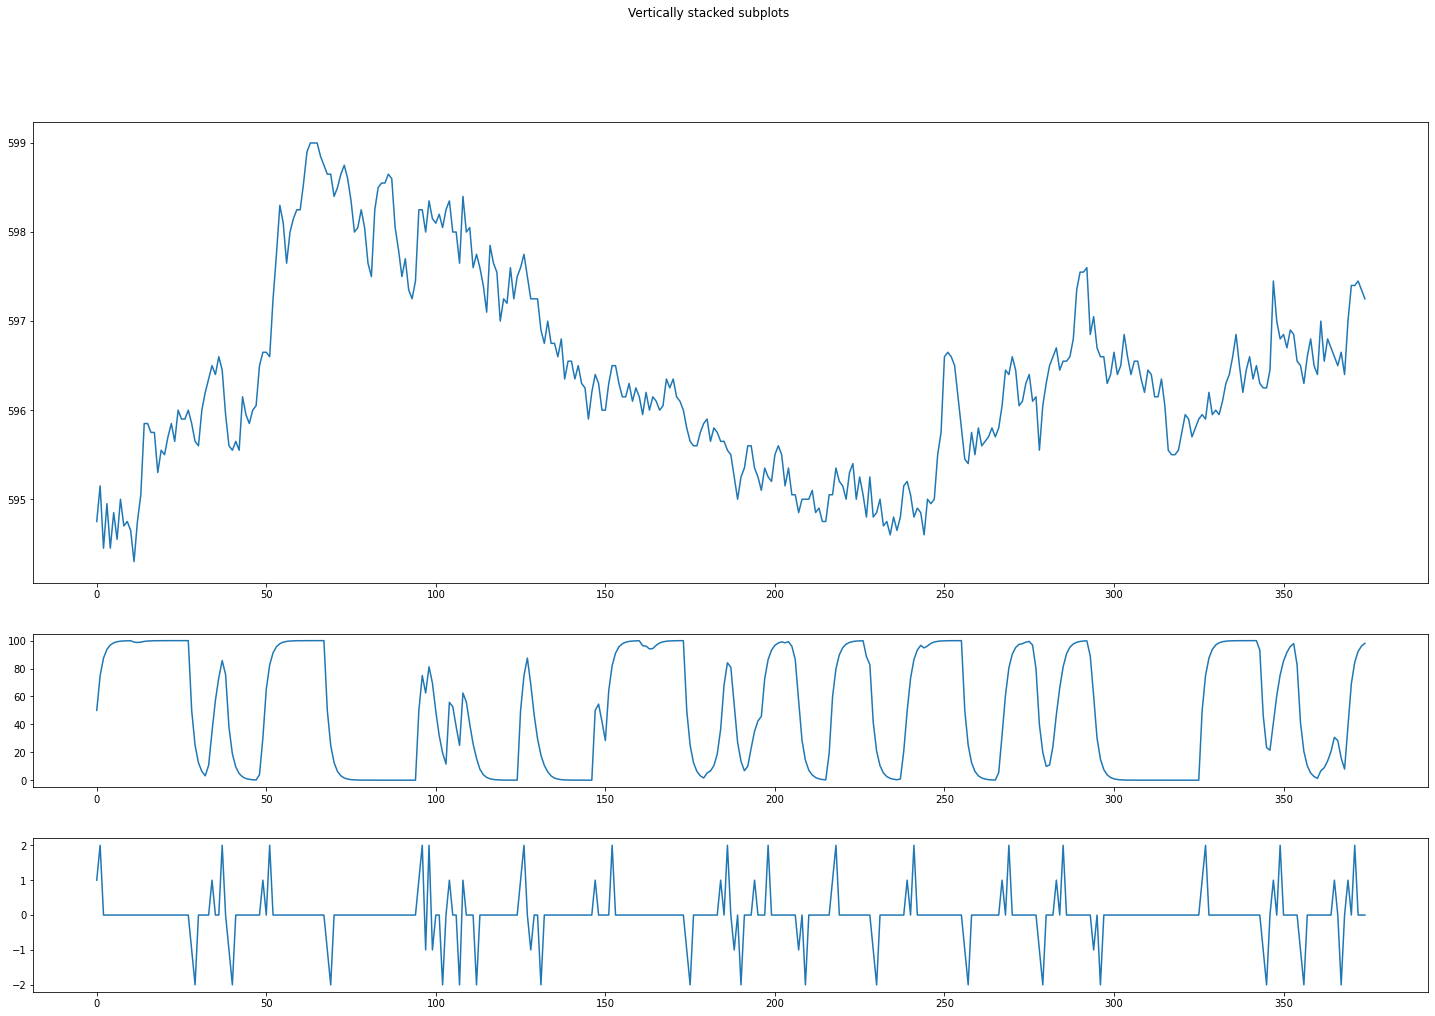

In [ ]:
# plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(3, figsize=(25, 16), gridspec_kw={'height_ratios': [3, 1, 1]})
fig.suptitle('Vertically stacked subplots')
axs[0].plot(close_val[375*4:375*5])
axs[1].plot(pff[375*4:375*5])
axs[2].plot(pff_signals[375*4:375*5])

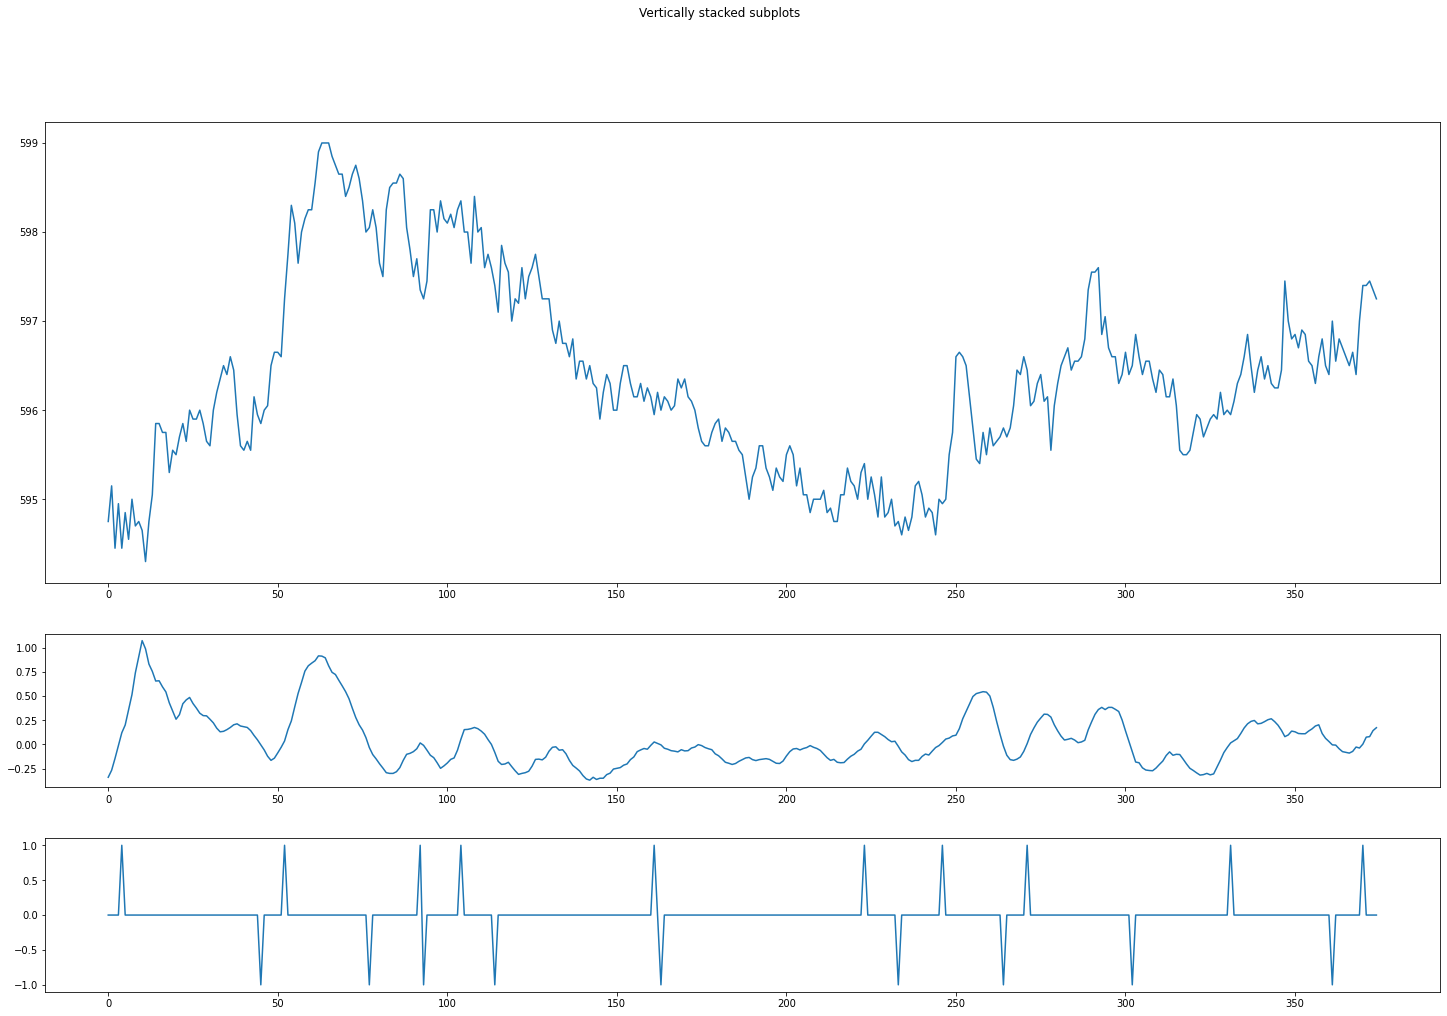

In [ ]:
fig, axs = plt.subplots(3, figsize=(25, 16), gridspec_kw={'height_ratios': [3, 1, 1]})
fig.suptitle('Vertically stacked subplots')
axs[0].plot(close_val[375*4:375*5])
axs[1].plot(sma10[375*4:375*5] - sma20[375*4:375*5])
axs[2].plot(ma_cross_signal[375*4:375*5])

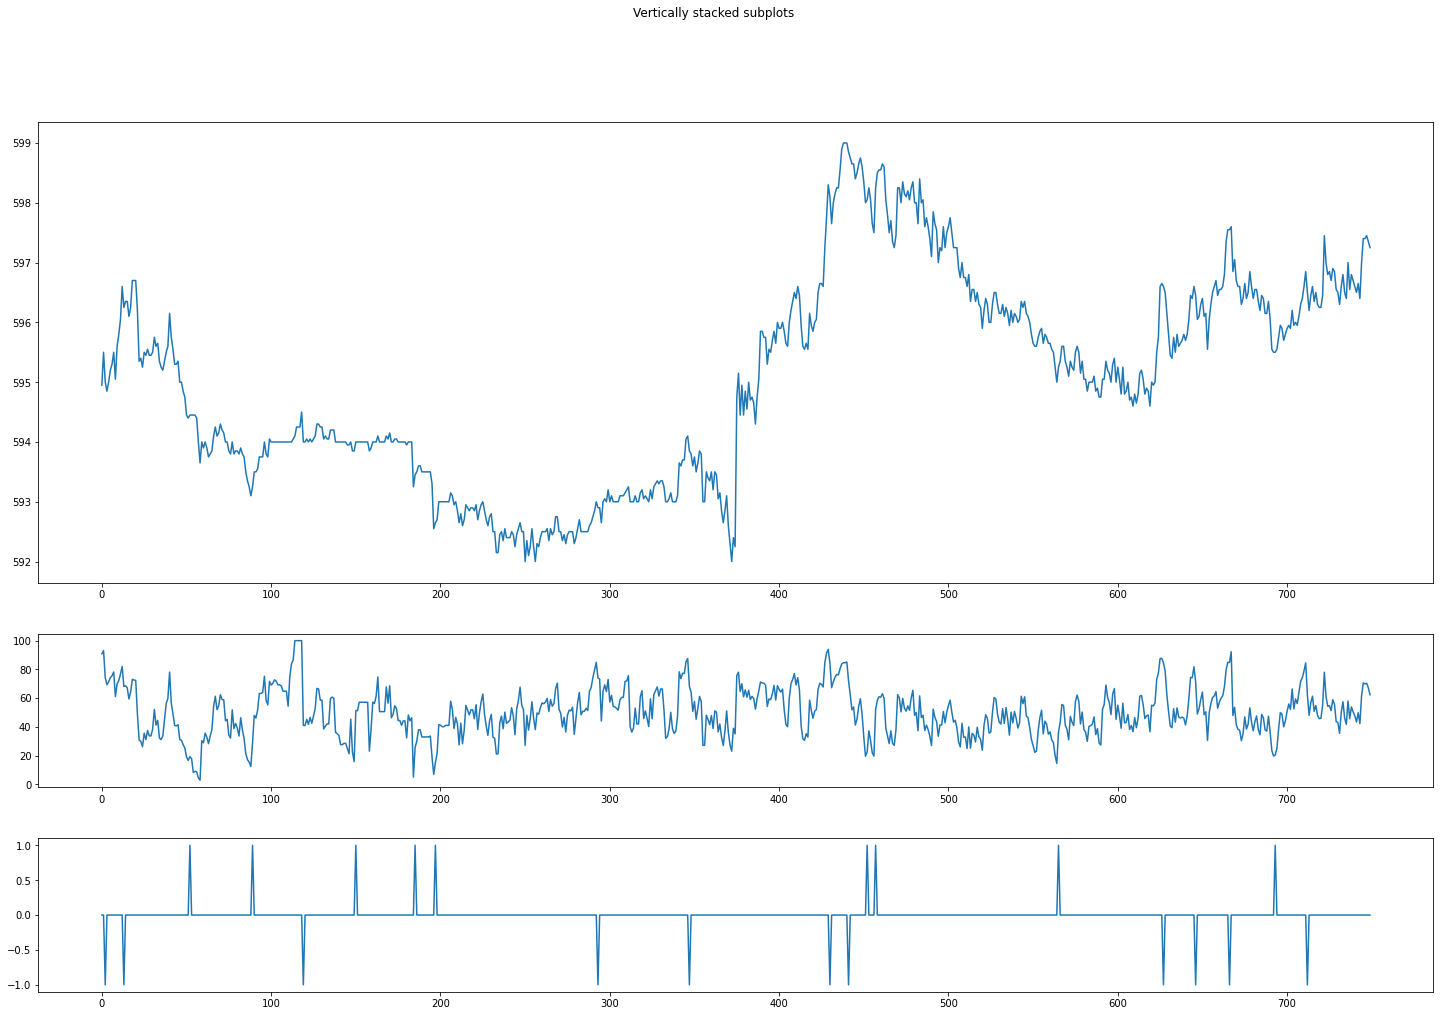

In [ ]:
fig, axs = plt.subplots(3, figsize=(25, 16), gridspec_kw={'height_ratios': [3, 1, 1]})
fig.suptitle('Vertically stacked subplots')
axs[0].plot(close_val[375*3:375*5])
axs[1].plot(rsi[375*3:375*5])
axs[2].plot(rsi_signal[375*3:375*5])

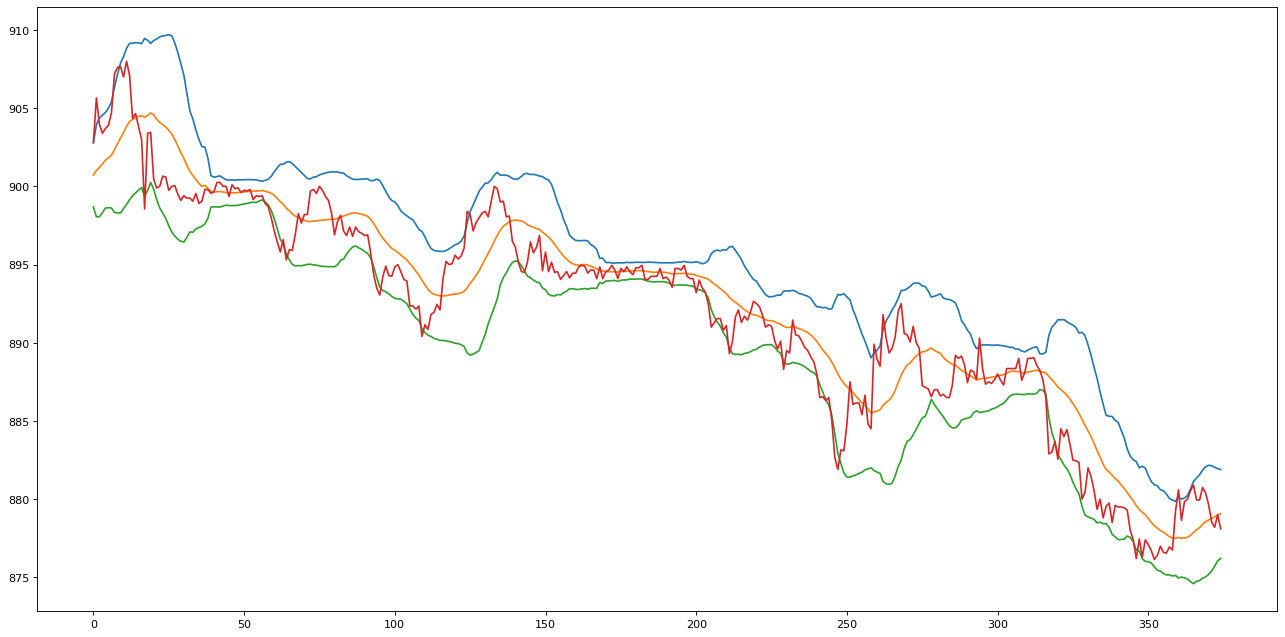

In [ ]:
plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(b_high[375*4:375*5], label="high")
plt.plot(b_mid[375*4:375*5], label="mid")
plt.plot(b_low[375*4:375*5], label="low")
plt.plot(close_val[375*4:375*5], label="price")

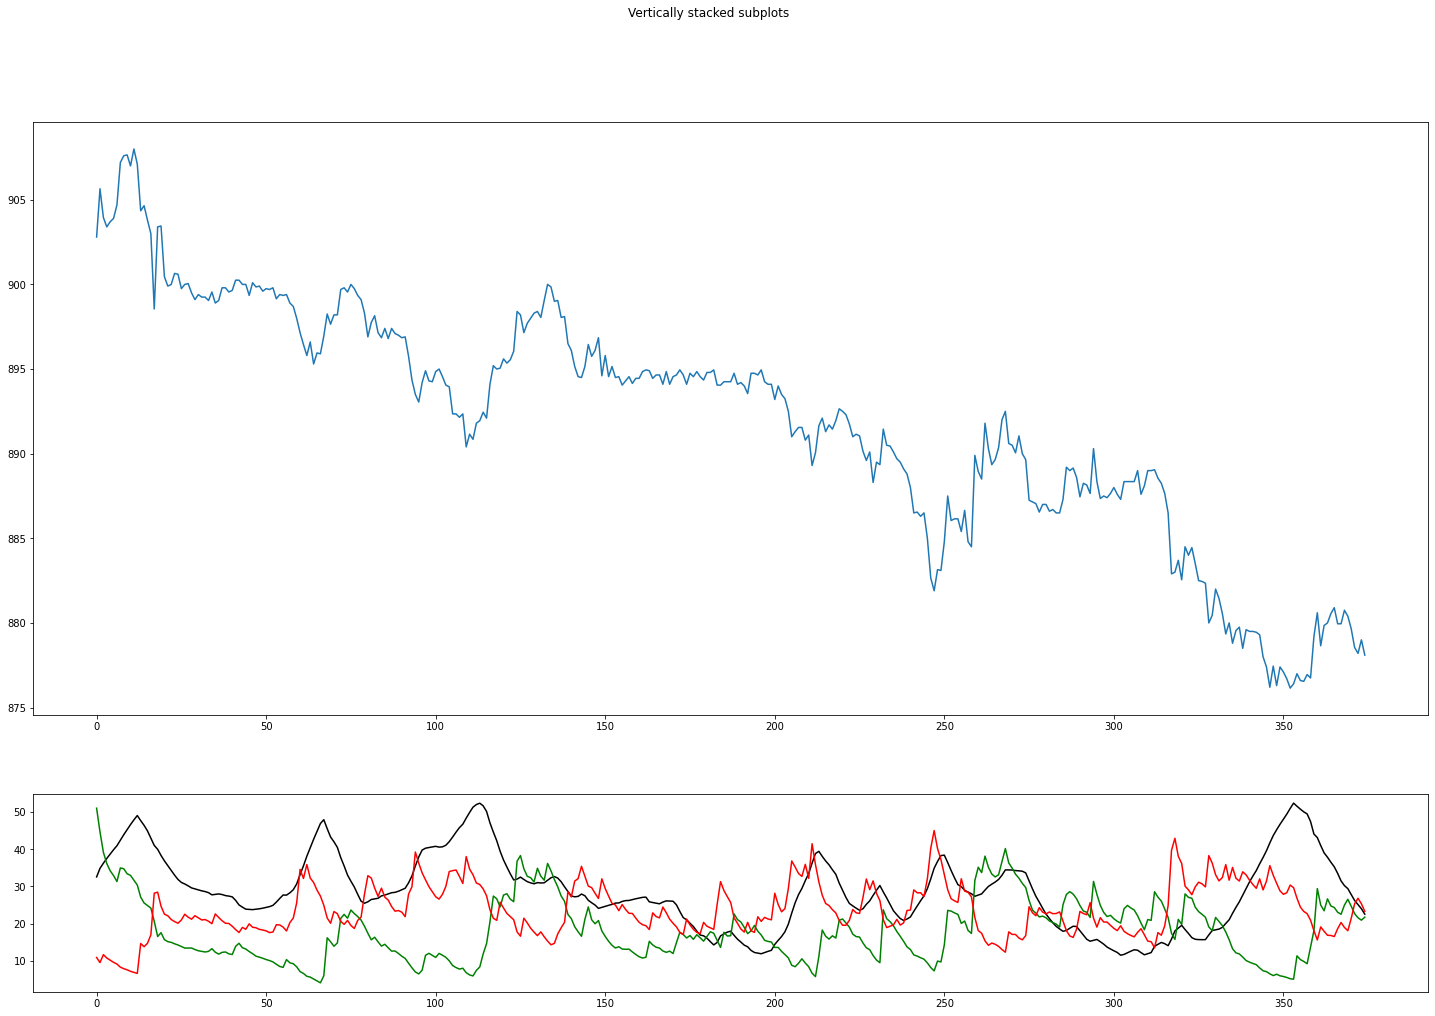

In [ ]:
fig, axs = plt.subplots(2, figsize=(25, 16), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Vertically stacked subplots')
axs[0].plot(close_val[375*4:375*5])
axs[1].plot(adx[375*4:375*5], label="adx", color="black")
axs[1].plot(plus_di[375*4:375*5], label="plus", color="green")
axs[1].plot(minus_di[375*4:375*5], label="minus", color="red")

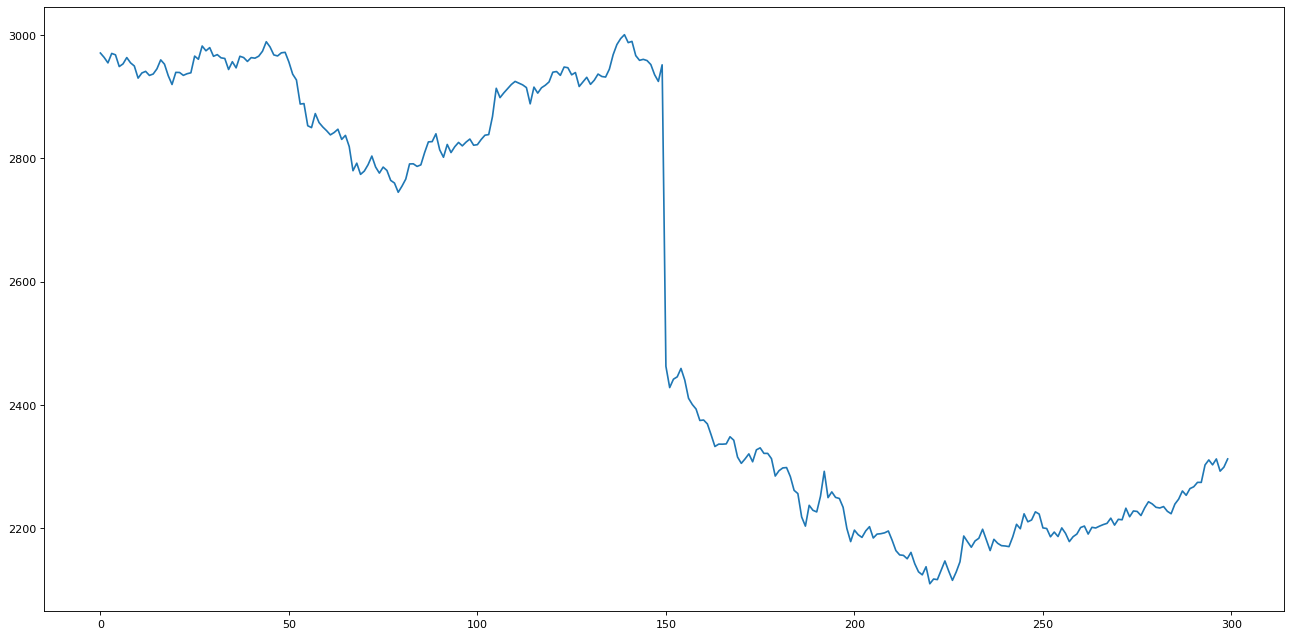

In [ ]:
plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(close_val[296100:296400])

In [ ]:
296250 / 375

790.0

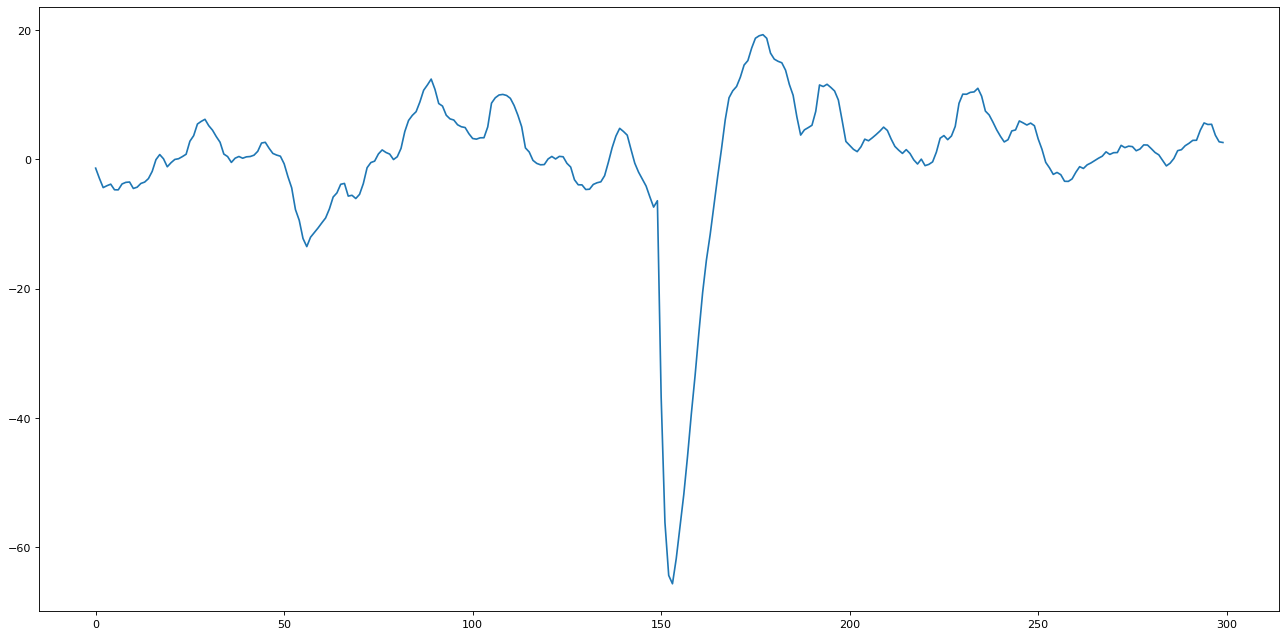

In [ ]:
plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(macd_val[296100:296400])

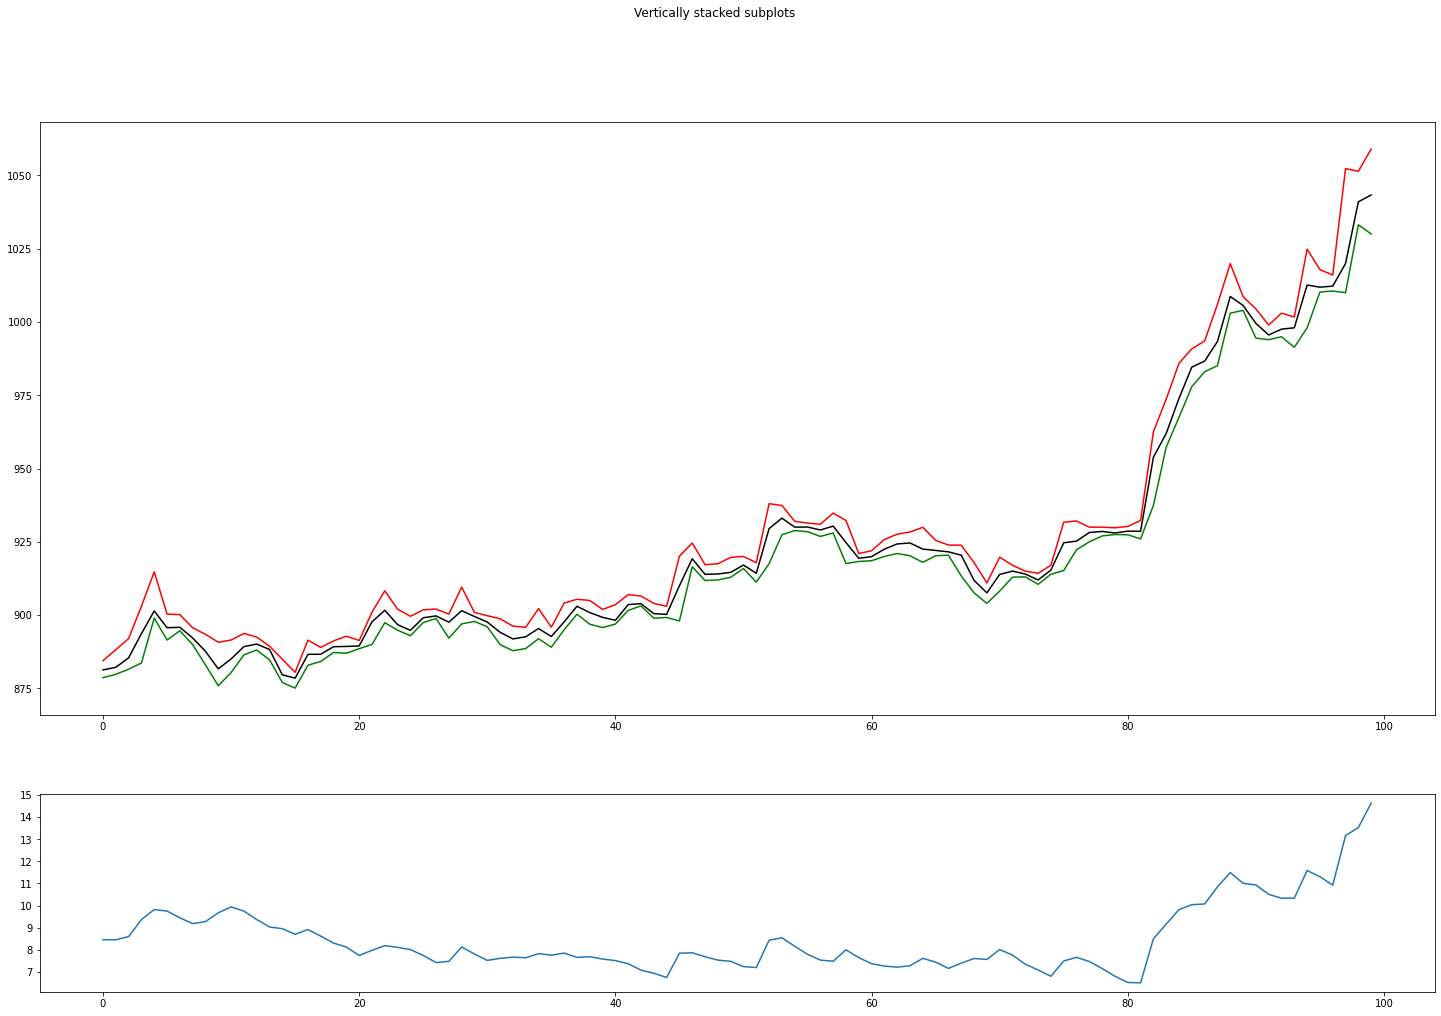

In [ ]:
fig, axs = plt.subplots(2, figsize=(25, 16), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Vertically stacked subplots')
axs[0].plot(hourly_avg_val[10*2:10*12], color="black")
axs[0].plot(hourly_high_val[10*2:10*12], color="red")
axs[0].plot(hourly_low_val[10*2:10*12], color="green")
axs[1].plot(atr[10*2:10*12])

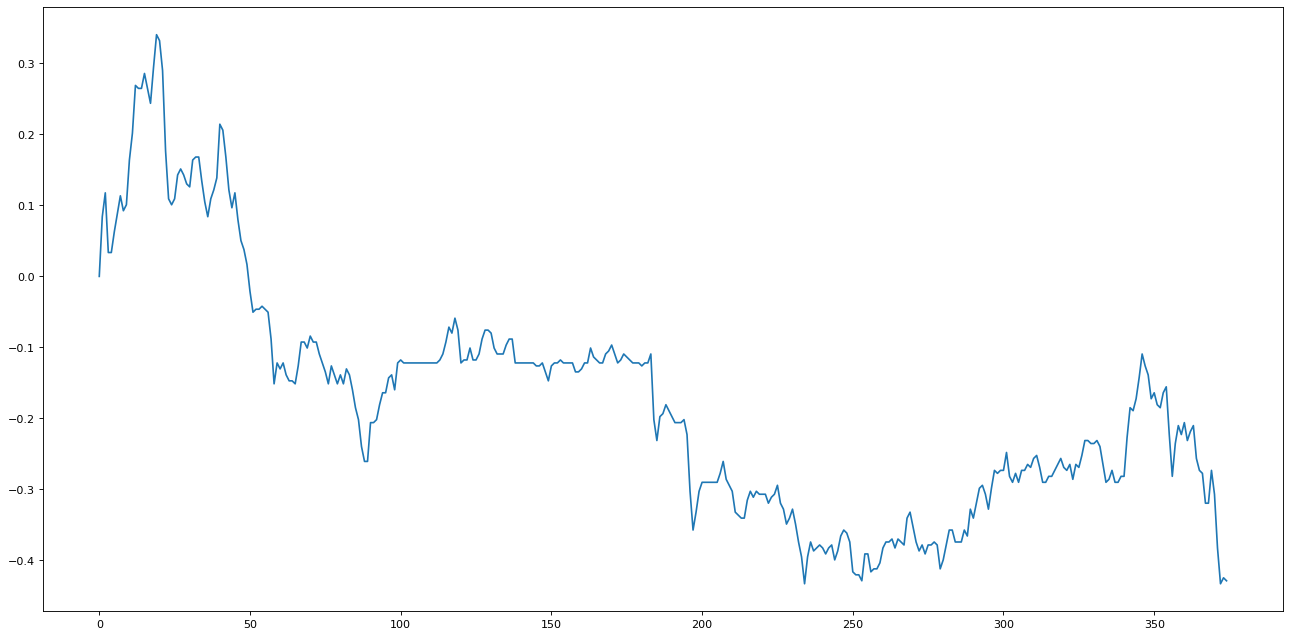

In [ ]:
plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
last_close_price = avg_val[375 * 3]
plt.plot(((avg_val[375*3 : 375*4] - last_close_price) * 100 / last_close_price))

In [ ]:
###############################                     LSTM    MODEL              ###################################

In [ ]:
df_time = pd.DataFrame.from_dict({'timestamp' : pd.to_datetime(df['timestamp']).dt.date})

In [ ]:
df_grouped = df_time.groupby(['timestamp']).timestamp.agg(['count'])

In [ ]:
indices = df_grouped['count'] < 375

In [ ]:
indices = df_time.join(indices, on='timestamp', how='inner')

In [ ]:
adjust = indices.groupby(['timestamp']).cumcount()

In [ ]:
df = df[np.logical_not(np.logical_or(indices['count'], adjust > 374))]

In [ ]:
  close_val = df['close'].values
  open_val = df['open'].values
  low_val = df['low'].values
  high_val = df['high'].values
  volume_val = df['volume'].values
  timestamps = df['timestamp'].values

In [ ]:
#data cleaning

I_set = []
for i in range(len(close_val)):
  if np.isnan(close_val[i]) or np.isnan(open_val[i]) or np.isnan(high_val[i]) or np.isnan(low_val[i]):
    I_set.append(i)

last_day = -1
day_no = []
n = len(I_set)
I_set.append(0)
I_set.insert(0, 0)
for i in range(1, n):
  this_day = I_set[i] // 375
  if last_day != this_day:
    last_day = this_day
    day_no.append([this_day, [], 0, 0])
  if I_set[i-1] + 1 != I_set[i] and I_set[i+1] - 1 != I_set[i]:
    day_no[-1][1].append(I_set[i])
    day_no[-1][2] += 1
  else:
    day_no[-1][3] += 1

day_no

for index in range(len(day_no)):
  if day_no[index][3] == 0 and day_no[index][2] <= 3:
    for i in day_no[index][1]:
      open_val[i] = (open_val[i-1] + open_val[i+1]) / 2
      close_val[i] = (close_val[i-1] + close_val[i+1]) / 2
      low_val[i] = (low_val[i-1] + low_val[i+1]) / 2
      high_val[i] = (high_val[i-1] + high_val[i+1]) / 2
      volume_val[i] = (volume_val[i-1] + volume_val[i+1]) / 2

for index in range(len(day_no) - 1, -1, -1):
  if day_no[index][3] > 0 or day_no[index][2] > 3:
    start = day_no[index][0] * 375
    end = start + 375
    timestamps = np.delete(timestamps, slice(start, end))
    close_val = np.delete(close_val, slice(start, end))
    open_val = np.delete(open_val, slice(start, end))
    high_val = np.delete(high_val, slice(start, end))
    low_val = np.delete(low_val, slice(start, end))
    volume_val = np.delete(volume_val, slice(start, end))

In [ ]:
df_niftybank = pd.DataFrame.from_dict({'timestamp' : timestamps, 'niftybank_close' : close_val})

In [ ]:
df_niftybank

,timestamp,niftybank_close
0,2017-01-02 09:15:00+05:30,18181.20
1,2017-01-02 09:16:00+05:30,18184.45
2,2017-01-02 09:17:00+05:30,18133.80
3,2017-01-02 09:18:00+05:30,18138.95
4,2017-01-02 09:19:00+05:30,18124.30
...,...,...
333370,2020-08-14 15:25:00+05:30,21688.55
333371,2020-08-14 15:26:00+05:30,21688.30
333372,2020-08-14 15:27:00+05:30,21692.40
333373,2020-08-14 15:28:00+05:30,21687.90


In [ ]:
df.__len__()

310125

In [ ]:
len(close_val) / 375

823.0

In [ ]:
avg_val = average_price(open_val, close_val)

In [ ]:
num_candles = len(avg_val)
num_minutes = 375
num_days = num_candles // num_minutes

In [ ]:
macd_val = create_macd(close_val)

In [ ]:
max(macd_val)

680.0333333333333

In [ ]:
np.argmin(macd_val[100:])

296153

In [ ]:
macd_val[macd_val > 100]

array([680.03333333, 543.65846154, 434.36290335, 346.95782079,
       277.09106272, 221.36922455, 176.88154258, 141.55198732,
       113.17038107])

In [ ]:
# macd
macd_cross = create_macd_cross(macd_val)  # define epsilon

In [ ]:
len(macd_cross[macd_cross == 1])

12950

In [ ]:
for i in range(50):
  print(macd_val[i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
680.0333333333333
543.6584615384616
434.36290335305716
346.9578207859202
277.0910627162915
221.36922455481067
176.88154258227564
141.55198732141275
113.17038107340056
90.62989742633386
72.76157319058609
58.38419760975421
46.87999882858321
37.55161815121869
-648.5384124042655
-518.7578279813465
-414.97229408324085
-331.9141308515668
-265.55351874637836
-212.51932742627613
-169.8368917502417
-135.9175146062123
-108.74518989752842
-86.97516193670141
-69.56289371792101
-55.62664419857508
-44.456918296530276
-35.51816851347877
-28.295182854005315
-22.576627100623735
-17.953611813116684
-14.29526744963239
-11.41351831581602
-9.114858412588045
-7.249483655282492
-5.720992204851907
-4.410112653100915
-3.5687109114332243


In [ ]:
np.argmax(macd_val)

12

In [ ]:
(sma10-sma20)[(sma10 - sma20) > 100]

array([850.11  , 849.565 , 849.145 , 848.745 , 848.375 , 848.25  ,
       848.17  , 847.74  , 847.355 , 846.905 , 101.1275, 117.3875,
       132.525 , 146.035 , 132.4725, 119.575 , 107.18  ])

In [ ]:
# rsi
rsi = create_smooth_rsi(close_val)
upper_limit = 80
lower_limit = 20

In [ ]:
rsi_signal = create_rsi_signal(rsi, upper_limit, lower_limit)

In [ ]:
pff = create_stc(close_val)
pff_signals = create_schaff_signal(pff)

In [ ]:
# [price_val_i , sma10 - sma20, macd_value_i, rsi_value_i, bolinger_i*3, ema100, onehot*4]
# ma cross
sma10 = create_sma(close_val, 10)
sma20 = create_sma(close_val, 20)
# ema100 = create_ema(close_val, 100)
# ma_cross_signal = create_ma_cross(sma10, sma20)

In [ ]:
# bolinger signals ?
b_high, b_mid, b_low = BBANDS(close_val, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# bolinger_signal = create_boilinger_signal(low, mid, high, close_val)

In [ ]:
adx = ADX(high_val, low_val, close_val, timeperiod=14)
plus_di = PLUS_DI(high_val, low_val, close_val, timeperiod=14)
minus_di = MINUS_DI(high_val, low_val, close_val, timeperiod=14)

In [ ]:
def create_hourly_price_till(index, timesteps, hourly_avg_price, hourly_close_price, hourly_high_price, hourly_low_price):
  global avg_val, close_val, high_val, low_val
  minutes = timesteps * 60
  end = min(len(close_val), index + 1)
  start = max((index + 1) % 60, index - minutes + 1)
  j = 0
  for i in np.arange(start, end, 60):
    hourly_avg_price[j] = np.average(avg_val[i: i + 60])
    hourly_close_price[j] = close_val[i + 59]
    hourly_high_price[j] = np.max(high_val[i: i + 60])
    hourly_low_price[j] = np.min(low_val[i: i + 60])
    j += 1
  return j

In [ ]:
atr = NATR(high_val, low_val, close_val, timeperiod=14)

In [ ]:
# hourly price should be created during batch creation

# hourly_avg_price = np.zeros(70)
# hourly_close_price = np.zeros(70)
# hourly_high_price = np.zeros(70)
# hourly_low_price = np.zeros(70)
# for i in range(num_candles):
#   j = create_hourly_price_till(i, 70, hourly_avg_price, hourly_close_price, hourly_high_price, hourly_low_price)
#   hourly_rsi = create_smooth_rsi(hourly_close_price[:j])[-20:]
#   hourly_atr = NATR(hourly_high_val[:j], hourly_low_val[:j], hourly_close_val[:j], timeperiod=14)[-20:]

In [ ]:
import os
import pickle

In [ ]:
# How to reconsider momentum signals that happened early and got classified as negative? - Use more than one momentum indicator with different sensitivity?
# position exiting stratergy ?
# Resistance trading ?

In [ ]:
def process_file(file_name):
  try:
    df = pd.read_csv(file_name, delimiter=',')
  except e:
    print(e)
    return None
  
  print('started with ', file_name)

  global df_niftybank
  
  # do sql-ish removal of missing data
  df = df.merge(df_niftybank, on='timestamp', how='inner')
  df_time = pd.DataFrame.from_dict({'timestamp' : pd.to_datetime(df['timestamp']).dt.date})
  df_grouped = df_time.groupby(['timestamp']).timestamp.agg(['count'])
  indices = df_grouped['count'] < 375
  indices = df_time.join(indices, on='timestamp', how='inner')
  adjust = indices.groupby(['timestamp']).cumcount()
  df = df[np.logical_not(np.logical_or(indices['count'], adjust > 374))]

  close_val = df['close'].values
  open_val = df['open'].values
  low_val = df['low'].values
  high_val = df['high'].values
  volume_val = df['volume'].values
  nb_close = df['niftybank_close'].values
	
  # remove/rectify nan values
  I_set = []
  for i in range(len(close_val)):
    if np.isnan(close_val[i]) or np.isnan(open_val[i]) or np.isnan(high_val[i]) or np.isnan(low_val[i]):
      I_set.append(i)

  last_day = -1
  day_no = []
  n = len(I_set)
  I_set.append(0)
  I_set.insert(0, 0)
  for i in range(1, n):
    this_day = I_set[i] // 375
    if last_day != this_day:
      last_day = this_day
      day_no.append([this_day, [], 0, 0])
    if I_set[i-1] + 1 != I_set[i] and I_set[i+1] - 1 != I_set[i]:
      day_no[-1][1].append(I_set[i])
      day_no[-1][2] += 1
    else:
      day_no[-1][3] += 1

  day_no

  for index in range(len(day_no)):
    if day_no[index][3] == 0 and day_no[index][2] <= 3:
      for i in day_no[index][1]:
        open_val[i] = (open_val[i-1] + open_val[i+1]) / 2
        close_val[i] = (close_val[i-1] + close_val[i+1]) / 2
        low_val[i] = (low_val[i-1] + low_val[i+1]) / 2
        high_val[i] = (high_val[i-1] + high_val[i+1]) / 2
        volume_val[i] = (volume_val[i-1] + volume_val[i+1]) / 2

  for index in range(len(day_no) - 1, -1, -1):
    if day_no[index][3] > 0 or day_no[index][2] > 3:
      start = day_no[index][0] * 375
      end = start + 375
      close_val = np.delete(close_val, slice(start, end))
      open_val = np.delete(open_val, slice(start, end))
      high_val = np.delete(high_val, slice(start, end))
      low_val = np.delete(low_val, slice(start, end))
      volume_val = np.delete(volume_val, slice(start, end))
      nb_close = np.delete(nb_close, slice(start, end))
  
  avg_val = average_price(open_val, close_val)
  num_candles = len(avg_val)
  num_minutes = 375
  print('days : ' + str(float(num_candles) / num_minutes))
  num_days = num_candles // num_minutes
  
  # macd
  macd_val = create_macd(close_val)
  macd_cross = create_macd_cross(macd_val)  # Can do : define epsilon
  
  # rsi
  rsi = create_smooth_rsi(close_val)
  upper_limit = 80
  lower_limit = 20
  rsi_signal = create_rsi_signal(rsi, upper_limit, lower_limit)
  
  # schaff
  pff = create_stc(close_val)
  pff_signals = create_schaff_signal(pff)
  
  # ma cross
  sma10 = create_sma(close_val, 10)
  sma20 = create_sma(close_val, 20)
  # ema100 = create_ema(close_val, 100)
  ma_cross_signal = create_ma_cross(sma10, sma20)
  
  # bolinger
  b_high, b_mid, b_low = BBANDS(close_val, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
  
  # NATR
  atr = NATR(high_val, low_val, close_val, timeperiod=14)
  # ADX
  adx = ADX(high_val, low_val, close_val, timeperiod=14)
  plus_di = PLUS_DI(high_val, low_val, close_val, timeperiod=14)
  minus_di = MINUS_DI(high_val, low_val, close_val, timeperiod=14)
 
  # for now ignore the first 30 mins due to large bumps and deviation which may make model behave badly there and overall
  to_ignore = 30
  daily_minutes = num_minutes - to_ignore
  day_ignore = 4
  num_samples = num_days - day_ignore
  X_price_info = np.zeros((num_samples, daily_minutes, 2))
  X_indicators = np.zeros((num_samples, daily_minutes, 5))
  X_bolinger = np.zeros((num_samples, daily_minutes, 4))
  X_adx = np.zeros((num_samples, daily_minutes, 3))
  X_onehot = np.zeros((num_samples, daily_minutes, 10))
  X_nb = np.zeros((num_samples, daily_minutes, 2))
  for day in range(day_ignore, num_days):
    start = num_minutes * day + to_ignore
    end = start + daily_minutes
    i = day - day_ignore
    for j in range(start, end):
      k = j - start
      X_price_info[i][k][1] = ((avg_val[j] - avg_val[j-1]) * 100 / avg_val[j-1])
      X_price_info[i][k][0] = avg_val[j]

      X_nb[i][k][1] = ((nb_close[j] - nb_close[j-1]) * 100 / nb_close[j-1]) 
      X_nb[i][k][0] = nb_close[j]
      
      X_indicators[i][k][0] = (sma10[j] - sma20[j]) * 100 / close_val[j-1]
      X_indicators[i][k][1] = (macd_val[j] * 500) / close_val[j-1]
      X_indicators[i][k][2] = rsi[j] / 100
      X_indicators[i][k][3] = pff[j] / 100
      X_indicators[i][k][4] = atr[j]
      
      # add volume ?
      X_bolinger[i][k][0] = (b_high[j] - close_val[j]) * 100 / close_val[j-1]
      X_bolinger[i][k][1] = (b_high[j] - b_low[j]) * 100 / close_val[j-1]
      X_bolinger[i][k][2] = (close_val[j] - b_low[j]) * 100 / close_val[j-1]
      X_bolinger[i][k][3] = (close_val[j] - b_mid[j]) * 100 / close_val[j-1]
      
      X_adx[i][k][0] = adx[j] / 100
      X_adx[i][k][1] = plus_di[j] / 100
      X_adx[i][k][2] = minus_di[j] / 100
      
      X_onehot[i][k][0] = (1 + rsi_signal[j]) // 2
      X_onehot[i][k][1] = (1 - rsi_signal[j]) // 2
      X_onehot[i][k][2] = (1 + macd_cross[j]) // 2
      X_onehot[i][k][3] = (1 - macd_cross[j]) // 2
      X_onehot[i][k][4] = (1 + ma_cross_signal[j]) // 2
      X_onehot[i][k][5] = (1 - ma_cross_signal[j]) // 2
      X_onehot[i][k][6] = int(pff_signals[j] == 2)
      X_onehot[i][k][7] = int(pff_signals[j] == 1)
      X_onehot[i][k][8] = int(pff_signals[j] == -1)
      X_onehot[i][k][9] = int(pff_signals[j] == -2)


  # Flatten and dump into csv but for now
  print('trying dumping by pickle')
  target_file_name = file_name.split('__')[0]
  if not os.path.exists(target_file_name):
    os.makedirs(target_file_name)

  os.chdir(target_file_name)  
  file = open('processed_data', 'wb')
  #super dumb approach
  pickle.dump({'X_price_info' : X_price_info,
              'X_indicators' : X_indicators,
              'X_adx' : X_adx,
              'X_bolinger' : X_bolinger,
              'X_onehot' : X_onehot,
              'X_nb' : X_nb,
              'high_val' : high_val, 
              'low_val' : low_val,
              'close_val' : close_val,
              'avg_val' : avg_val}, file)
  file.close()
  os.chdir('..')

  print('processed_successfully')



In [ ]:
%ls -l

total 142578
-rw------- 1 root root 19855254 Aug 16 07:34 AXISBANK__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 20819583 Aug 16 07:34 BAJFINANCE__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 20397667 Aug 16 07:34 HDFCBANK__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 21026418 Aug 16 07:34 HDFC__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 20078776 Aug 16 07:34 ICICIBANK__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 21067770 Aug 16 07:34 NIFTY_50__EQ__INDICES__NSE__MINUTE.csv
-rw------- 1 root root 21417156 Aug 16 07:34 NIFTY_BANK__EQ__INDICES__NSE__MINUTE.csv
drwx------ 5 root root     4096 Sep 15  2007 ta-lib/
-rw------- 1 root root  1330299 Sep 15  2007 ta-lib-0.4.0-src.tar.gz


In [ ]:
files =  ['BAJFINANCE__EQ__NSE__NSE__MINUTE.csv', 'AXISBANK__EQ__NSE__NSE__MINUTE.csv', 'HDFCBANK__EQ__NSE__NSE__MINUTE.csv', 'HDFC__EQ__NSE__NSE__MINUTE.csv', 'ICICIBANK__EQ__NSE__NSE__MINUTE.csv']

In [ ]:
for file_name in files:
  process_file(file_name)

started with  BAJFINANCE__EQ__NSE__NSE__MINUTE.csv
days : 886.0
trying dumping by pickle
processed_successfully
started with  AXISBANK__EQ__NSE__NSE__MINUTE.csv
days : 886.0
trying dumping by pickle
processed_successfully
started with  HDFCBANK__EQ__NSE__NSE__MINUTE.csv
days : 885.0
trying dumping by pickle
processed_successfully
started with  HDFC__EQ__NSE__NSE__MINUTE.csv
days : 885.0
trying dumping by pickle
processed_successfully
started with  ICICIBANK__EQ__NSE__NSE__MINUTE.csv
days : 885.0
trying dumping by pickle
processed_successfully


In [ ]:
%ls -l

total 142598
drwx------ 2 root root     4096 Sep 25 04:04 AXISBANK/
-rw------- 1 root root 19855254 Aug 16 07:34 AXISBANK__EQ__NSE__NSE__MINUTE.csv
drwx------ 2 root root     4096 Sep 25 04:03 BAJFINANCE/
-rw------- 1 root root 20819583 Aug 16 07:34 BAJFINANCE__EQ__NSE__NSE__MINUTE.csv
drwx------ 2 root root     4096 Sep 25 04:05 HDFC/
drwx------ 2 root root     4096 Sep 25 04:05 HDFCBANK/
-rw------- 1 root root 20397667 Aug 16 07:34 HDFCBANK__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 21026418 Aug 16 07:34 HDFC__EQ__NSE__NSE__MINUTE.csv
drwx------ 2 root root     4096 Sep 25 04:06 ICICIBANK/
-rw------- 1 root root 20078776 Aug 16 07:34 ICICIBANK__EQ__NSE__NSE__MINUTE.csv
-rw------- 1 root root 21067770 Aug 16 07:34 NIFTY_50__EQ__INDICES__NSE__MINUTE.csv
-rw------- 1 root root 21417156 Aug 16 07:34 NIFTY_BANK__EQ__INDICES__NSE__MINUTE.csv
drwx------ 5 root root     4096 Sep 15  2007 ta-lib/
-rw------- 1 root root  1330299 Sep 15  2007 ta-lib-0.4.0-src.tar.gz
